In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium
import plotly as py
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.express as px

pyo.init_notebook_mode(connected=True)
%matplotlib inline

In [169]:
data = pd.read_csv(r"C:\Users\nki\Desktop\retail\SampleSuperstore.csv")
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [170]:
data.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [171]:
data.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [172]:
data.shape

(9994, 13)

In [173]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [174]:
data.describe(include="object")

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
count,9994,9994,9994,9994,9994,9994,9994,9994
unique,4,3,1,531,49,4,3,17
top,Standard Class,Consumer,United States,New York City,California,West,Office Supplies,Binders
freq,5968,5191,9994,915,2001,3203,6026,1523


## For all segments 

In [180]:
ship_profit = data.groupby("Ship Mode")["Profit"].sum().reset_index()
ship_profit.head()

,Ship Mode,Profit
0,First Class,48969.8399
1,Same Day,15891.7589
2,Second Class,57446.6354
3,Standard Class,164088.7875


C:\Users\nki\AppData\Local\Temp\ipykernel_12040\1256290994.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Ship Mode', ylabel='Profit'>

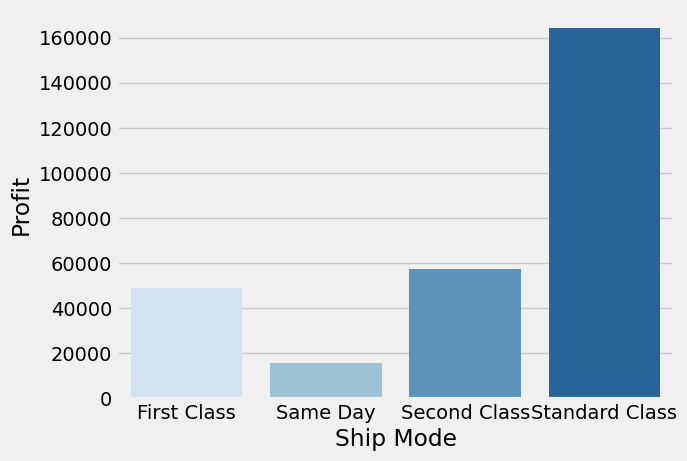

In [189]:
sns.barplot(x="Ship Mode",y="Profit",data=ship_profit, palette="Blues")

In [193]:
state_profit = data.groupby("State")["Profit"].sum().reset_index()
state_profit.head()

,State,Profit
0,Alabama,5786.8253
1,Arizona,-3427.9246
2,Arkansas,4008.6871
3,California,76381.3871
4,Colorado,-6527.8579


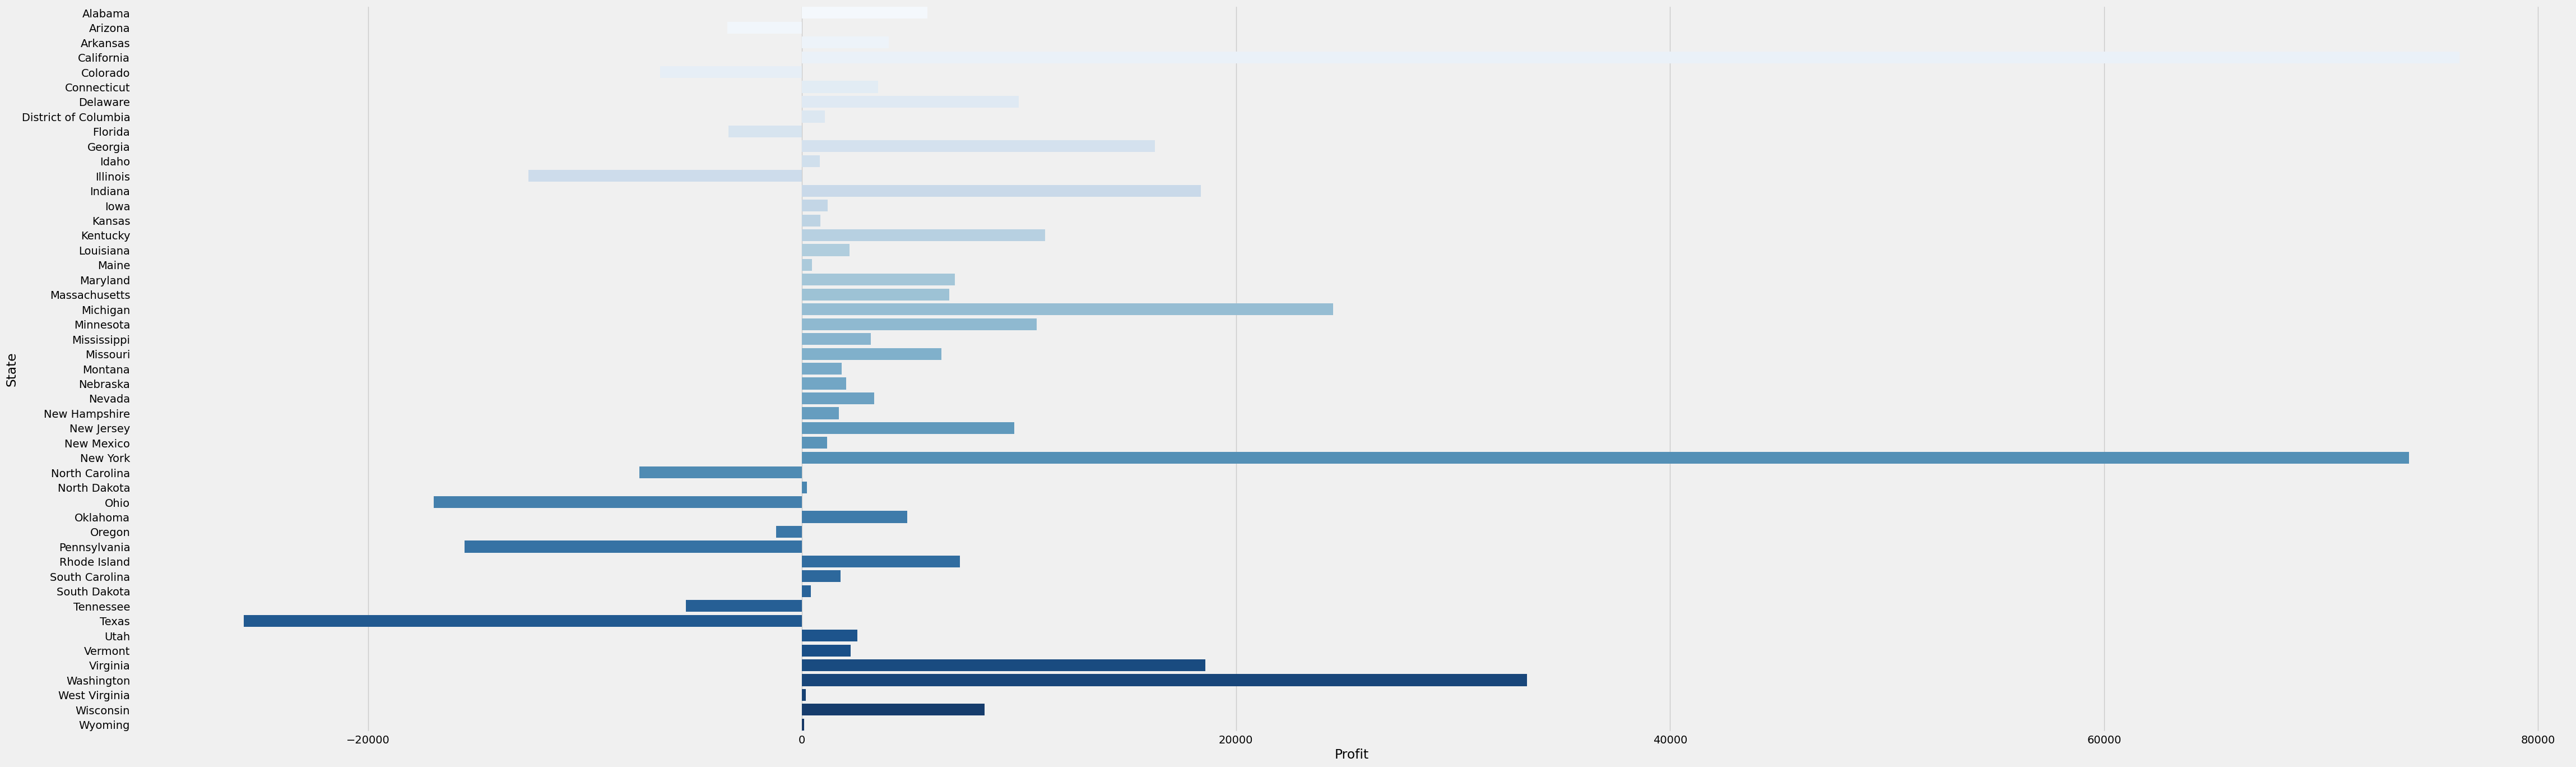

In [204]:
plt.figure(figsize=(50, 16))
sns. barplot(x="Profit",y="State",data=state_profit,hue="State", palette="Blues", orient="h",dodge=False)
plt.show()


In [217]:
state_city_profit = data.groupby(["State","City"])["Profit"].sum().to_frame()
state_city_profit.head(20)


Profit
State   City                    
Alabama Auburn          452.6071
        Decatur        1000.0881
        Florence        248.6589
        Hoover           18.7173
        Huntsville     1005.2572
        Mobile         2175.8292
        Montgomery      834.6571
        Tuscaloosa       51.0104
Arizona Avondale         76.1690
        Bullhead City     6.7232
        Chandler         81.4605
        Gilbert         138.2530
        Glendale        182.8598
        Mesa           -559.2314
        Peoria          -55.1076
        Phoenix       -2790.8832
        Scottsdale      -89.4879
        Sierra Vista     16.8281
        Tempe            95.4496
        Tucson          -64.9668

In [236]:
state_city_profit.loc[state_city_profit.Profit == state_city_profit.Profit.min()]

,,Profit
State,City,
Pennsylvania,Philadelphia,-13837.7674


In [238]:
state_city_profit.loc[state_city_profit.Profit == state_city_profit.Profit.max()]

,,Profit
State,City,
New York,New York City,62036.9837


<Axes: xlabel='Region', ylabel='Profit'>

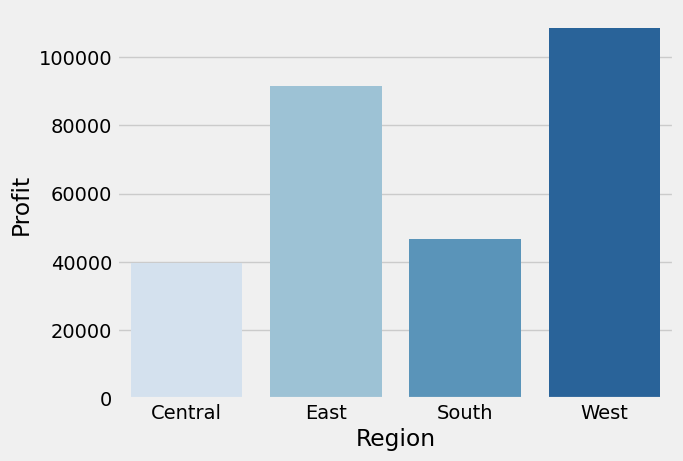

In [240]:
region_profit = data.groupby("Region")["Profit"].sum().reset_index()

sns.barplot(x="Region",y="Profit",data=region_profit,hue="Region", palette="Blues")

<Axes: xlabel='Category', ylabel='Profit'>

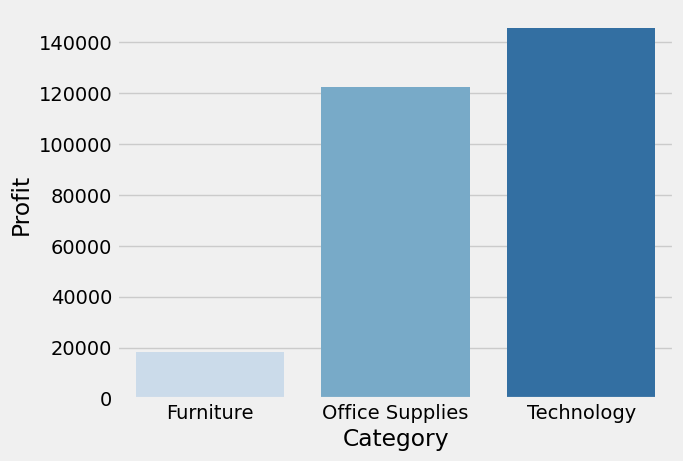

In [242]:
category_profit = data.groupby("Category")["Profit"].sum().reset_index()

sns.barplot(x="Category",y="Profit",data=category_profit,hue="Category", palette="Blues")

## For each segment

<Axes: xlabel='Segment', ylabel='Profit'>

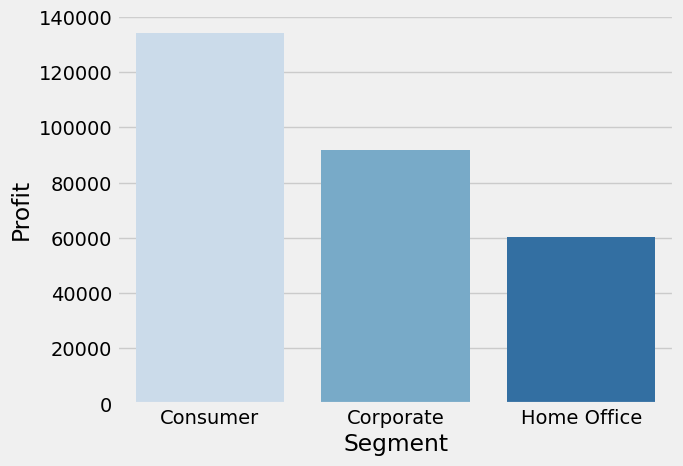

In [243]:
segment_profit = data.groupby("Segment")["Profit"].sum().reset_index()

sns.barplot(x="Segment",y="Profit",data=segment_profit,hue="Segment", palette="Blues")

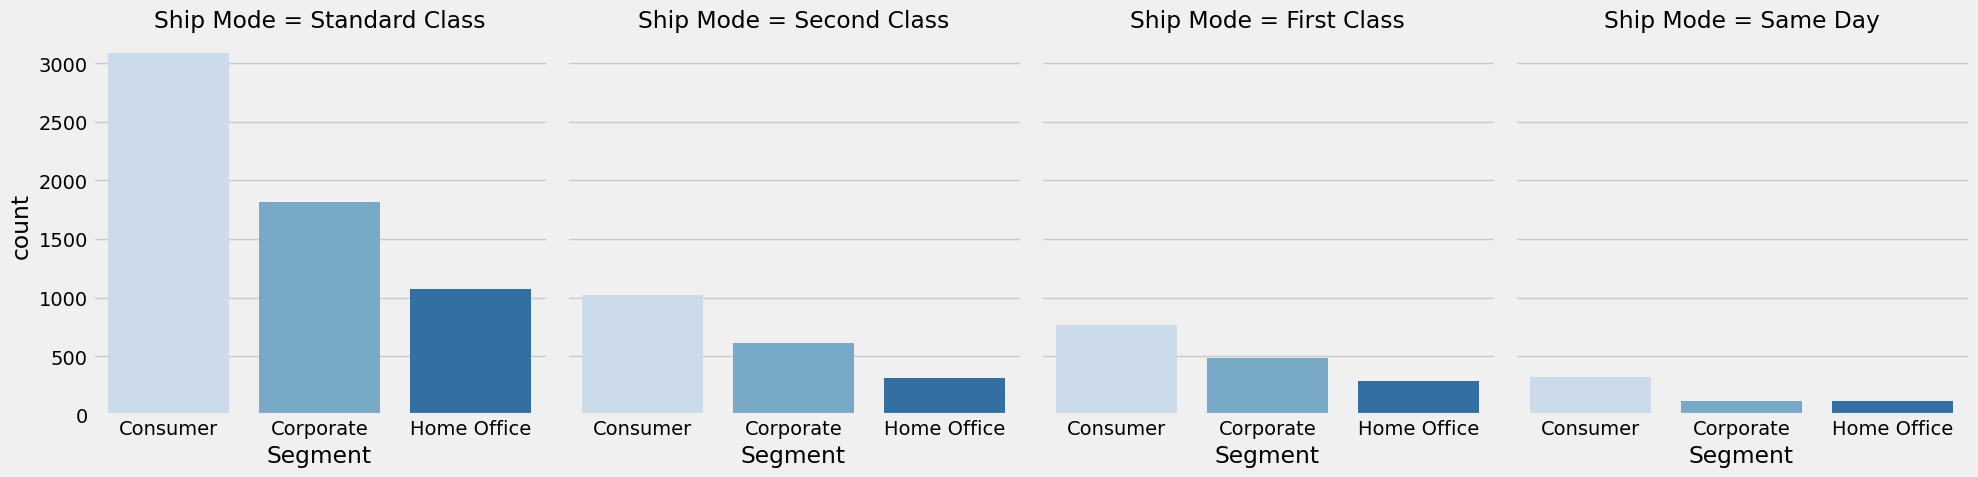

In [257]:
segment_shipmode = data.groupby(["Segment"])["Ship Mode"].value_counts().to_frame().reset_index()
sns.catplot(x="Segment",y="count", col="Ship Mode",data=segment_shipmode,kind="bar", hue="Segment",palette="Blues")

In [274]:
state_segment = data.groupby(["State"])["Segment"].value_counts().to_frame().reset_index()

state_segment.loc[state_segment["count"] == state_segment['count'].max()]

,State,Segment,count
9,California,Consumer,1048


In [275]:
state_segment.loc[state_segment["count"] == state_segment['count'].min()]

,State,Segment,count
113,South Carolina,Home Office,1
127,Vermont,Home Office,1
135,West Virginia,Consumer,1
139,Wyoming,Home Office,1


In [276]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}




In [277]:
data["State"] = data["State"].map(us_state_abbrev)

In [278]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,KY,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,KY,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,CA,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,FL,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,FL,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [293]:
dff = data[['State','Profit']]

In [294]:
dff = dff.groupby('State').sum().reset_index()

In [295]:
dff.head()

,State,Profit
0,AL,5786.8253
1,AR,4008.6871
2,AZ,-3427.9246
3,CA,76381.3871
4,CO,-6527.8579


In [296]:
dff.columns

Index(['State', 'Profit'], dtype='object')

In [297]:
dff = dict(type='choropleth',colorscale='Blues',locations=data['State'],locationmode='USA-states',z=data['Profit'],text=data['State'],colorbar={'title':'Profit'}, marker=dict(line=dict(color='rgb(255,255,255)',width=2)))

In [298]:
layout = dict(geo=dict(scope='usa', showlakes=True, lakecolor='rgb(85,173,240)'), title="Profit Across USA")

In [299]:
go.Figure(data=[dff], layout=layout)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'colorbar': {'title': {'text': 'Profit'}},
              'colorscale': [[0.0, 'rgb(247,251,255)'], [0.125,
                             'rgb(222,235,247)'], [0.25, 'rgb(198,219,239)'],
                             [0.375, 'rgb(158,202,225)'], [0.5,
                             'rgb(107,174,214)'], [0.625, 'rgb(66,146,198)'],
                             [0.75, 'rgb(33,113,181)'], [0.875, 'rgb(8,81,156)'],
                             [1.0, 'rgb(8,48,107)']],
              'locationmode': 'USA-states',
              'locations': array(['KY', 'KY', 'CA', ..., 'CA', 'CA', 'CA'], dtype=object),
              'marker': {'line': {'color': 'rgb(255,255,255)', 'width': 2}},
              'text': array(['KY', 'KY', 'CA', ..., 'CA', 'CA', 'CA'], dtype=object),
              'type': 'choropleth',
              'z': array([ 41.9136, 219.582 ,   6.8714, ...,  19.3932,  13.32  ,  72.948 ])}],
    'layout': {'geo': {'lakecolor': 'rgb(85,173,240)', 'scope': 'usa', 'showlakes': True},
               'template': '...',
               'title': {'text': 'Profit Across USA'}}
})